## Dependencies

In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [3]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Keras Specific Dependencies

In [34]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


## Loading and Preprocessing our Data

### Load the Dataset

In [5]:
df = pd.read_csv("mega.csv", index_col=0)
df = df[['TIMESTAMP', 'Delta_18O', 'Delta_D', 'Landscape']]

In [33]:
df.dtypes

TIMESTAMP      int64
Delta_18O    float64
Delta_D      float64
Landscape     object
dtype: object

In [6]:
X = df[['TIMESTAMP', 'Delta_18O', 'Delta_D']]
y = df.Landscape

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (92704, 3)
Training Data Labels Shape: (92704,)


### Plot the first digit

In [8]:
# Plot the first image from the dataset
# plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [9]:
# Our image is an array of pixels ranging from 0 to 255
# X_train[0, :, :]

### For Logistic Regression, we want to flatten our data into rows of 1D image arrays

In [22]:
# X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [28]:
X_train.shape

(92704, 3)

In [25]:
# We want to flatten our data to a 1D array 
ndims = X_train.shape[0] * X_train.shape[1] 
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

IndexError: tuple index out of range

## Scaling and Normalization

We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

In [17]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Alternative way to normalize this dataset since we know that the max pixel value is 255
# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")
# X_train /= 255.0
# X_test /= 255.0

## One-Hot Encoding

We need to one-hot encode our integer labels using the `to_categorical` helper function

In [21]:
len(y.unique())

11

In [18]:
# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

81139        Cropland
53624        Mountain
39525          Forest
82692        Cropland
13309           Urban
63339        Mountain
65503        Mountain
104372           Lake
136860      Grassland
55161        Mountain
39723          Forest
45888            Snow
97966     Urban/Coast
1751         Mountain
41136            Snow
71841           Coast
27183           Urban
83592        Cropland
59904        Mountain
82363        Cropland
Name: Landscape, dtype: object

In [36]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 11
y_train = one_hot(y_train, num_classes)
# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

## Building our Model

In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

## Our first step is to create an empty sequential model

In [24]:
# Create an empty sequential model
model = Sequential()

## Next, we add our first hidden layer

In the first hidden layer, we must also specify the dimension of our input layer. This will simply be the number of elements (pixels) in each image.

In [25]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

## We then add a second hidden layer with 100 densely connected nodes

A dense layer is when every node from the previous layer is connected to each node in the current layer.

In [26]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))

## Our final output layer uses a `softmax` activation function for logistic regression.

We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

In [27]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

## Compiling our Model

In [28]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

## Model Summary

In [29]:
# We can summarize our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1111      
Total params: 11,611
Trainable params: 11,611
Non-trainable params: 0
_________________________________________________________________


## Compile and Train our Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [30]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [31]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10


ValueError: in user code:

    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:532 train_step  **
        loss = self.compiled_loss(
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/rob/Code/PythonDataNW/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 11) are incompatible


## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [21]:
# Save the model
model.save("mnist_trained.h5")

In [22]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [23]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

313/313 - 1s - loss: 0.0782 - accuracy: 0.9795
Loss: 0.07815560698509216, Accuracy: 0.9794999957084656


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [24]:
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

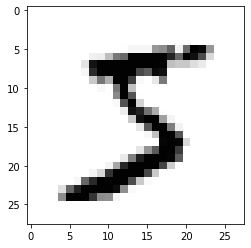

In [25]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [26]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

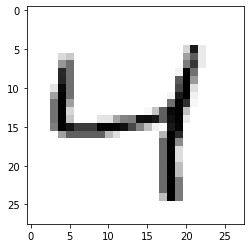

In [28]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [29]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted class: [4]


# Import a Custom Image

In [30]:
filepath = "../Images/test8.png"

In [31]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [32]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [33]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

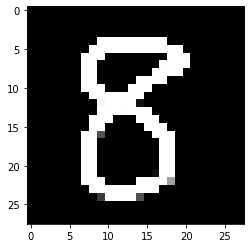

In [34]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

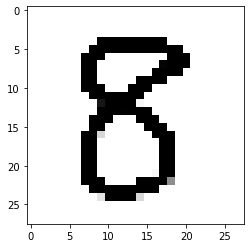

In [35]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [36]:
# Make predictions
model.predict_classes(img)

array([8])